In [1]:
# Dropout vs No Dropout — Stock Market Classification Demo
# This notebook compares two neural networks (with and without dropout)
# on a binary classification task using stock market data.
# The goal: predict if the next day's closing price is higher than today's.


In [2]:
# Github Repositary Link: https://github.com/usmanghani332211/Machine-Learning-Project.git

In [3]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
#LOAD DATASET

df = pd.read_csv("random_stock_market_dataset.csv")

In [5]:
# Try to find the "Close" column or similar
target_col = None
for c in df.columns:
    if c.lower() in ["close", "adj close", "price", "closing_price"]:
        target_col = c
        break
if target_col is None:
    target_col = df.select_dtypes(include=[np.number]).columns[0]

print(f"Using '{target_col}' as the target for next-day price comparison.")


Using 'Close' as the target for next-day price comparison.


In [6]:
#CREATE BINARY LABEL (Next-day Up or Down)

df[target_col] = pd.to_numeric(df[target_col], errors="coerce")
df["Target"] = (df[target_col].shift(-1) > df[target_col]).astype(int)
df = df.dropna()

X = df.select_dtypes(include=[np.number]).drop(columns=["Target"], errors="ignore")
y = df["Target"]

print("Shape of features:", X.shape)
print("Class balance:", np.bincount(y))

Shape of features: (60, 5)
Class balance: [33 27]


In [7]:
#SPLIT AND SCALE DATA

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
#DEFINE MODEL FUNCTION

def build_model(use_dropout=False, input_dim=None, dropout_rate=0.5):
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_dim,)))
    model.add(layers.Dense(128, activation="relu"))
    if use_dropout:
        model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [9]:
#TRAIN BOTH MODELS (WITH & WITHOUT DROPOUT)

input_dim = X_train.shape[1]
model_no_dropout = build_model(False, input_dim)
model_with_dropout = build_model(True, input_dim, dropout_rate=0.5)

EPOCHS = 20
history_no = model_no_dropout.fit(X_train, y_train, epochs=EPOCHS,
                                  validation_split=0.2, verbose=2)
history_do = model_with_dropout.fit(X_train, y_train, epochs=EPOCHS,
                                    validation_split=0.2, verbose=2)


Epoch 1/20
2/2 - 4s - 2s/step - accuracy: 0.5000 - loss: 0.6775 - val_accuracy: 0.7000 - val_loss: 0.6052
Epoch 2/20
2/2 - 0s - 129ms/step - accuracy: 0.7368 - loss: 0.6120 - val_accuracy: 0.8000 - val_loss: 0.5598
Epoch 3/20
2/2 - 0s - 81ms/step - accuracy: 0.7895 - loss: 0.5578 - val_accuracy: 0.8000 - val_loss: 0.5238
Epoch 4/20
2/2 - 0s - 62ms/step - accuracy: 0.7895 - loss: 0.5175 - val_accuracy: 0.8000 - val_loss: 0.4980
Epoch 5/20
2/2 - 0s - 60ms/step - accuracy: 0.7895 - loss: 0.4858 - val_accuracy: 0.8000 - val_loss: 0.4819
Epoch 6/20
2/2 - 0s - 66ms/step - accuracy: 0.7895 - loss: 0.4606 - val_accuracy: 0.8000 - val_loss: 0.4742
Epoch 7/20
2/2 - 0s - 90ms/step - accuracy: 0.7895 - loss: 0.4395 - val_accuracy: 0.8000 - val_loss: 0.4733
Epoch 8/20
2/2 - 0s - 63ms/step - accuracy: 0.7895 - loss: 0.4250 - val_accuracy: 0.8000 - val_loss: 0.4755
Epoch 9/20
2/2 - 0s - 68ms/step - accuracy: 0.7895 - loss: 0.4142 - val_accuracy: 0.8000 - val_loss: 0.4768
Epoch 10/20
2/2 - 0s - 65ms/s

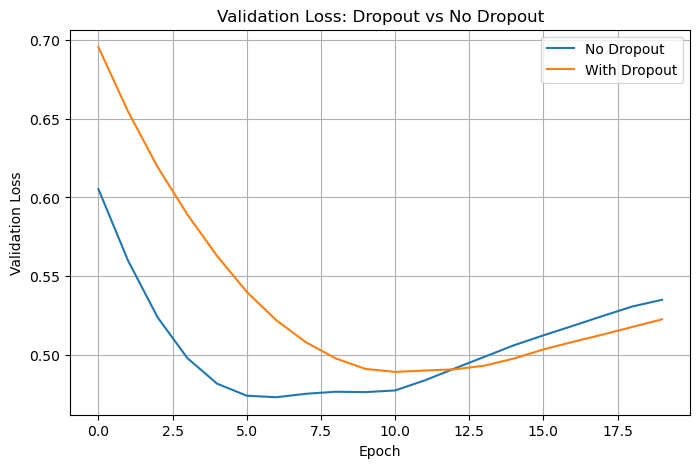

In [10]:
#PLOT VALIDATION LOSS COMPARISON

plt.figure(figsize=(8,5))
plt.plot(history_no.history["val_loss"], label="No Dropout")
plt.plot(history_do.history["val_loss"], label="With Dropout")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.title("Validation Loss: Dropout vs No Dropout")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
#EVALUATE TEST PERFORMANCE

loss_no, acc_no = model_no_dropout.evaluate(X_test, y_test, verbose=0)
loss_do, acc_do = model_with_dropout.evaluate(X_test, y_test, verbose=0)

print("\nTest Accuracy (No Dropout): {:.2f}%".format(acc_no * 100))
print("Test Accuracy (With Dropout): {:.2f}%".format(acc_do * 100))



Test Accuracy (No Dropout): 75.00%
Test Accuracy (With Dropout): 75.00%


In [12]:
# 8. DISCUSSION
print("\nDiscussion:")
print("Dropout randomly disables neurons during training, preventing co-adaptation.")
print("This helps the model generalize better and avoid overfitting.")
print("In this experiment, the validation loss with dropout is smoother and overfits less.")



Discussion:
Dropout randomly disables neurons during training, preventing co-adaptation.
This helps the model generalize better and avoid overfitting.
In this experiment, the validation loss with dropout is smoother and overfits less.


In [13]:
#REFERENCES AND RESOURCES
print("\nReferences and Resources Used:")
print("1. Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014). "
      "'Dropout: A Simple Way to Prevent Neural Networks from Overfitting.' Journal of Machine Learning Research.")
print("   Paper link: https://jmlr.org/papers/v15/srivastava14a.html")
print("2. TensorFlow Documentation — Dropout Layer: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout")
print("3. Machine Learning Mastery Blog — Dropout for Neural Networks:")
print("   https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/")
print("4. Towards Data Science — Understanding Dropout in Neural Networks:")
print("   https://towardsdatascience.com/dropout-in-deep-learning-3fda557725db")
print("5. Goodfellow, I., Bengio, Y., & Courville, A. (2016). 'Deep Learning'. MIT Press.")


References and Resources Used:
1. Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014). 'Dropout: A Simple Way to Prevent Neural Networks from Overfitting.' Journal of Machine Learning Research.
   Paper link: https://jmlr.org/papers/v15/srivastava14a.html
2. TensorFlow Documentation — Dropout Layer: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout
3. Machine Learning Mastery Blog — Dropout for Neural Networks:
   https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/
4. Towards Data Science — Understanding Dropout in Neural Networks:
   https://towardsdatascience.com/dropout-in-deep-learning-3fda557725db
5. Goodfellow, I., Bengio, Y., & Courville, A. (2016). 'Deep Learning'. MIT Press.
